<a href="https://colab.research.google.com/github/Aqui1983/Module_13_Activities/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [3]:
# Read in data
data = Path("/content/student_loans.csv")
df = pd.read_csv(data)
df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Create the features (X) and target (y) sets
X = df.drop(columns=['credit_ranking'])
y = df['credit_ranking'].values


In [9]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Define a model with 1 hidden layer

In [12]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()

# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes,
          input_dim=number_input_features,
          activation='relu')
)

# Output layer
nn.add(Dense(units=1, activation='linear'))


In [16]:
# Compile the model
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# Train the model
model_1 = nn.fit(X,y,validation_split=0.30, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 8ms/step - loss: 40.8188 - mse: 40.8188 - val_loss: 41.2983 - val_mse: 41.2983
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 37.0476 - mse: 37.0476 - val_loss: 38.0631 - val_mse: 38.0631
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 33.7205 - mse: 33.7205 - val_loss: 35.2877 - val_mse: 35.2877
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 30.7416 - mse: 30.7416 - val_loss: 32.8286 - val_mse: 32.8286
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 28.0526 - mse: 28.0526 - val_loss: 30.6212 - val_mse: 30.6212
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 25.5953 - mse: 25.5953 - val_loss: 28.6230 - val_mse: 28.6230
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 23.3386 - mse: 23.3386 - val_loss: 26.7856 - val_mse: 26.7856
Epoch 8/200
35/35 [==============================] - 0s

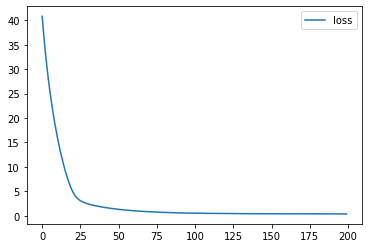

In [18]:
# Plot the train and test loss function
plt.plot(model_1.history['loss'])
plt.legend(['loss'])
plt.show()

## Define a model with 2 hidden layers

In [20]:
# Define the model - deep neural net
number_input_features = 11
number_nodes_layer1 = 8
number_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(Dense(units=number_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(Dense(units=number_nodes_layer2, input_dim=number_input_features, activation='relu'))


# Output layer
nn.add(Dense(units=1, activation='linear'))



In [22]:
# Compile model
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# Fit the model
model_2 = nn.fit(X,y,validation_split=0.30,epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 7ms/step - loss: 28.0435 - mse: 28.0435 - val_loss: 26.3561 - val_mse: 26.3561
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 24.8530 - mse: 24.8530 - val_loss: 23.2831 - val_mse: 23.2831
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 20.5885 - mse: 20.5885 - val_loss: 19.2902 - val_mse: 19.2902
Epoch 4/200
35/35 [==============================] - 0s 4ms/step - loss: 15.3533 - mse: 15.3533 - val_loss: 14.5166 - val_mse: 14.5166
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 10.1953 - mse: 10.1953 - val_loss: 10.0605 - val_mse: 10.0605
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 6.5994 - mse: 6.5994 - val_loss: 6.9030 - val_mse: 6.9030
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 4.6244 - mse: 4.6244 - val_loss: 4.8195 - val_mse: 4.8195
Epoch 8/200
35/35 [==============================] - 0s 3ms/ste

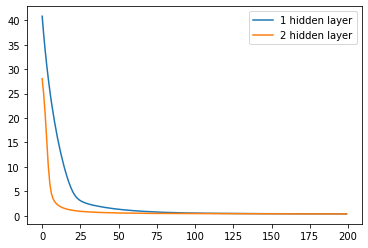

In [23]:
# Overlay results of deep and shallow models
plt.plot(model_1.history['loss'])
plt.plot(model_2.history['loss'])
plt.legend(['1 hidden layer','2 hidden layer'])
plt.show()

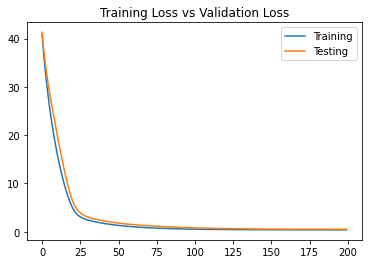

In [25]:
# Train vs test for shallow net
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.legend(['Training','Testing'])
plt.show()

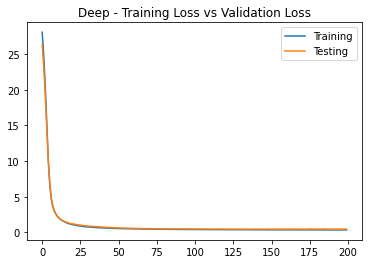

In [26]:
# Train vs test for deep net
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('Deep - Training Loss vs Validation Loss')
plt.legend(['Training','Testing'])
plt.show()
